In [164]:
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
import plotly.graph_objects as go
import plotly.offline as py

In [166]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [167]:
#Read DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Vaibhav-1911/DATA-602/main/Assignment%206/pima_indian_data.csv')

In [168]:
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [169]:
df.shape

(768, 9)

In [170]:
df.isnull().values.any()

False

In [171]:
df.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [173]:
df = df.rename(columns = {"Number  of times pregnant":"Number of times pregnant"})

Column "Number  of times pregnant" has an extra space in the name, which has been corrected above.

In [174]:
def hist_plots(column, data):
    if column in data:
        f, axes = plt.subplots(1,1, figsize = (15,5))
        sns.countplot(x = column, data=data)
        plt.xticks(rotation = 90)
        plt.suptitle(column, fontsize = 20)
        plt.show()
    plt.show()

## Checking the distribution of data in the dataset using histogram

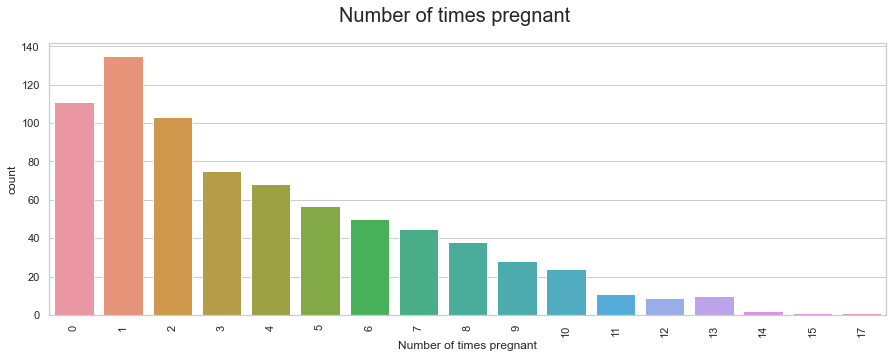

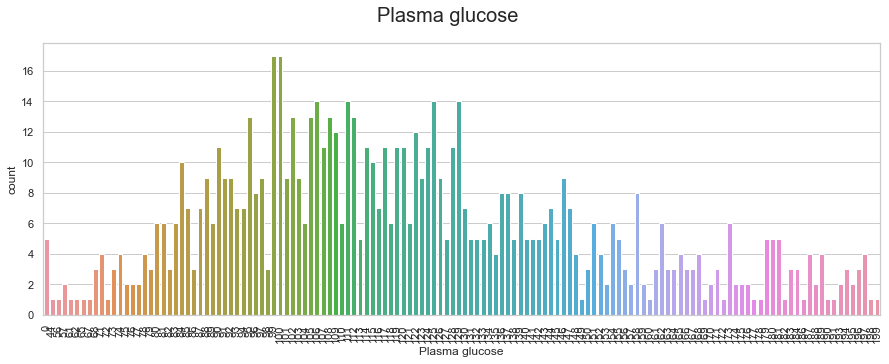

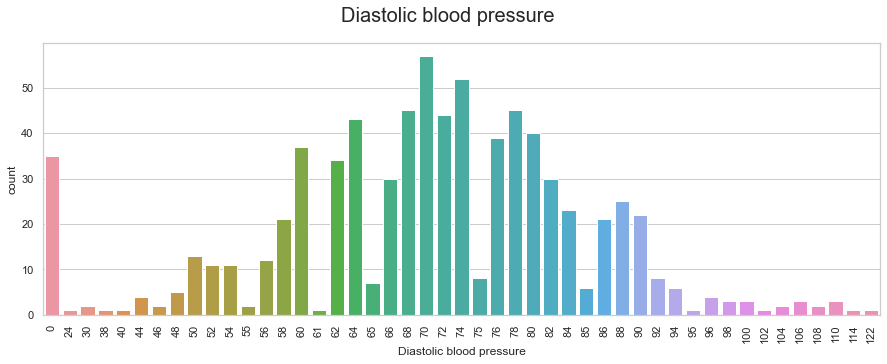

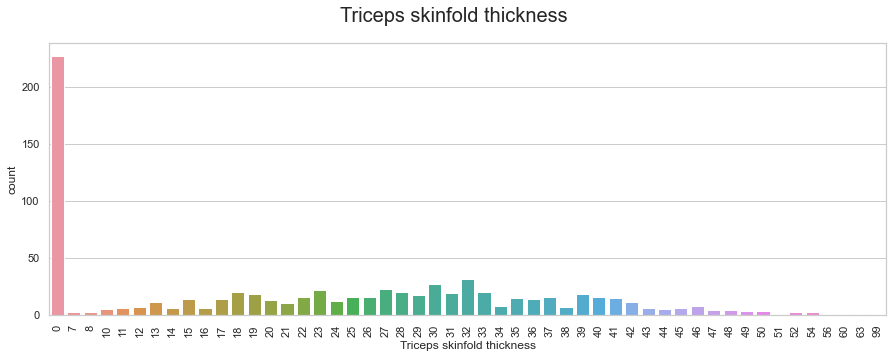

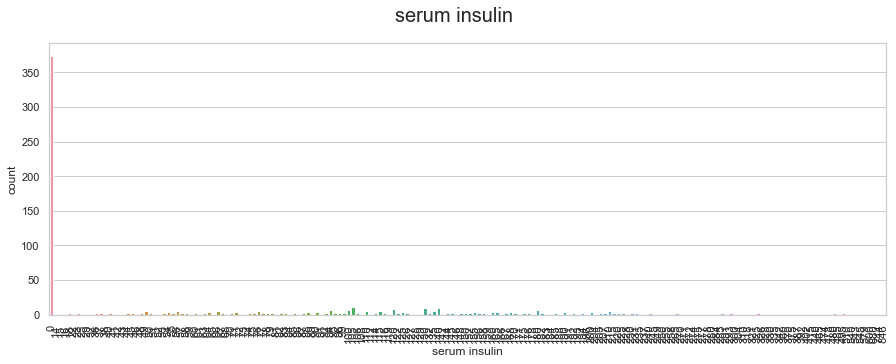

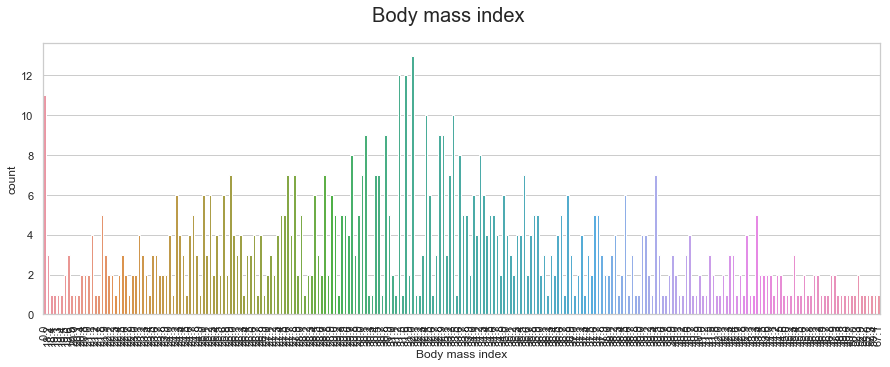

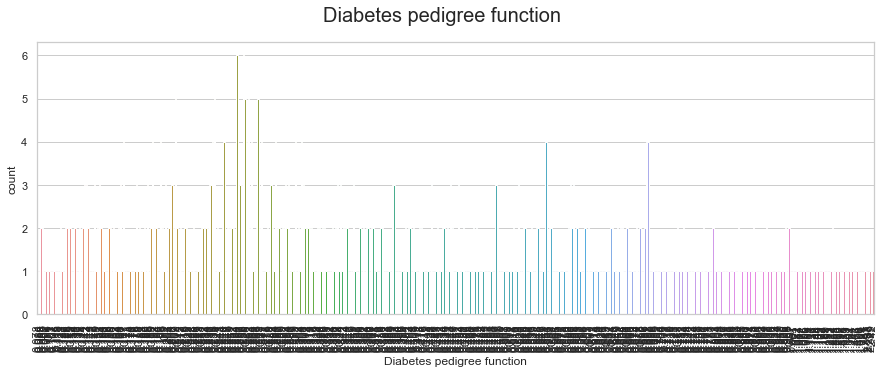

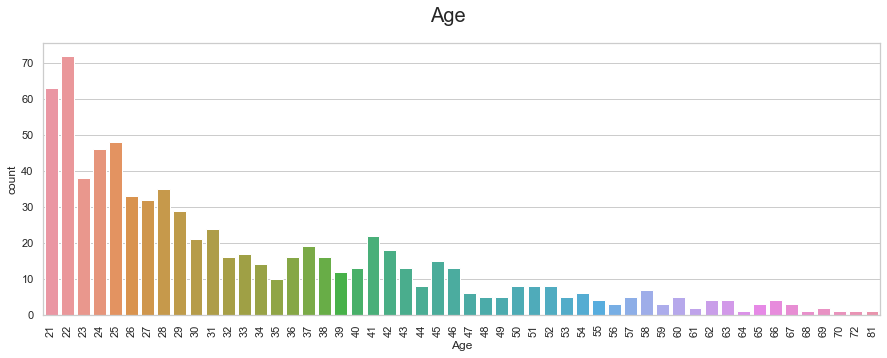

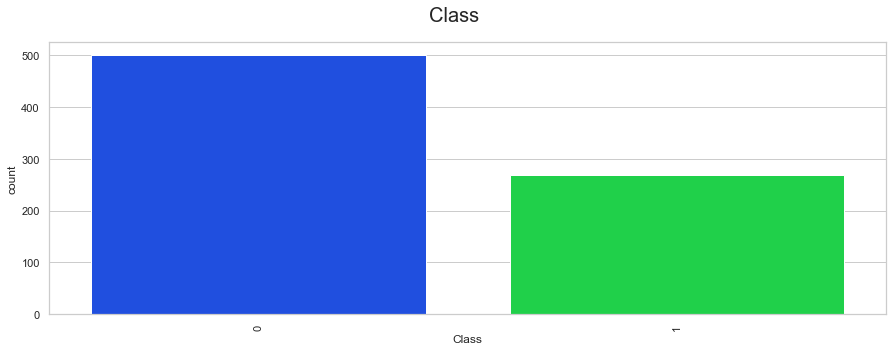

In [175]:
for column in df.columns:
    hist_plots(column, df)

- Apart from the basic distribution We identify that for a lot of columns sch as **Plasma glucose, Diastolic blood pressure, Triceps skinfold thickness, serum insulin, Body mass index** we have values as 0. We will impute these later on in the assignment in order to run logistic regression.

- Also, We can see that in the **Class** column ratio of 0:1 is 500 / 268. Since, this is a pretty imbalanced ratio, we might face poor prediction results later on.

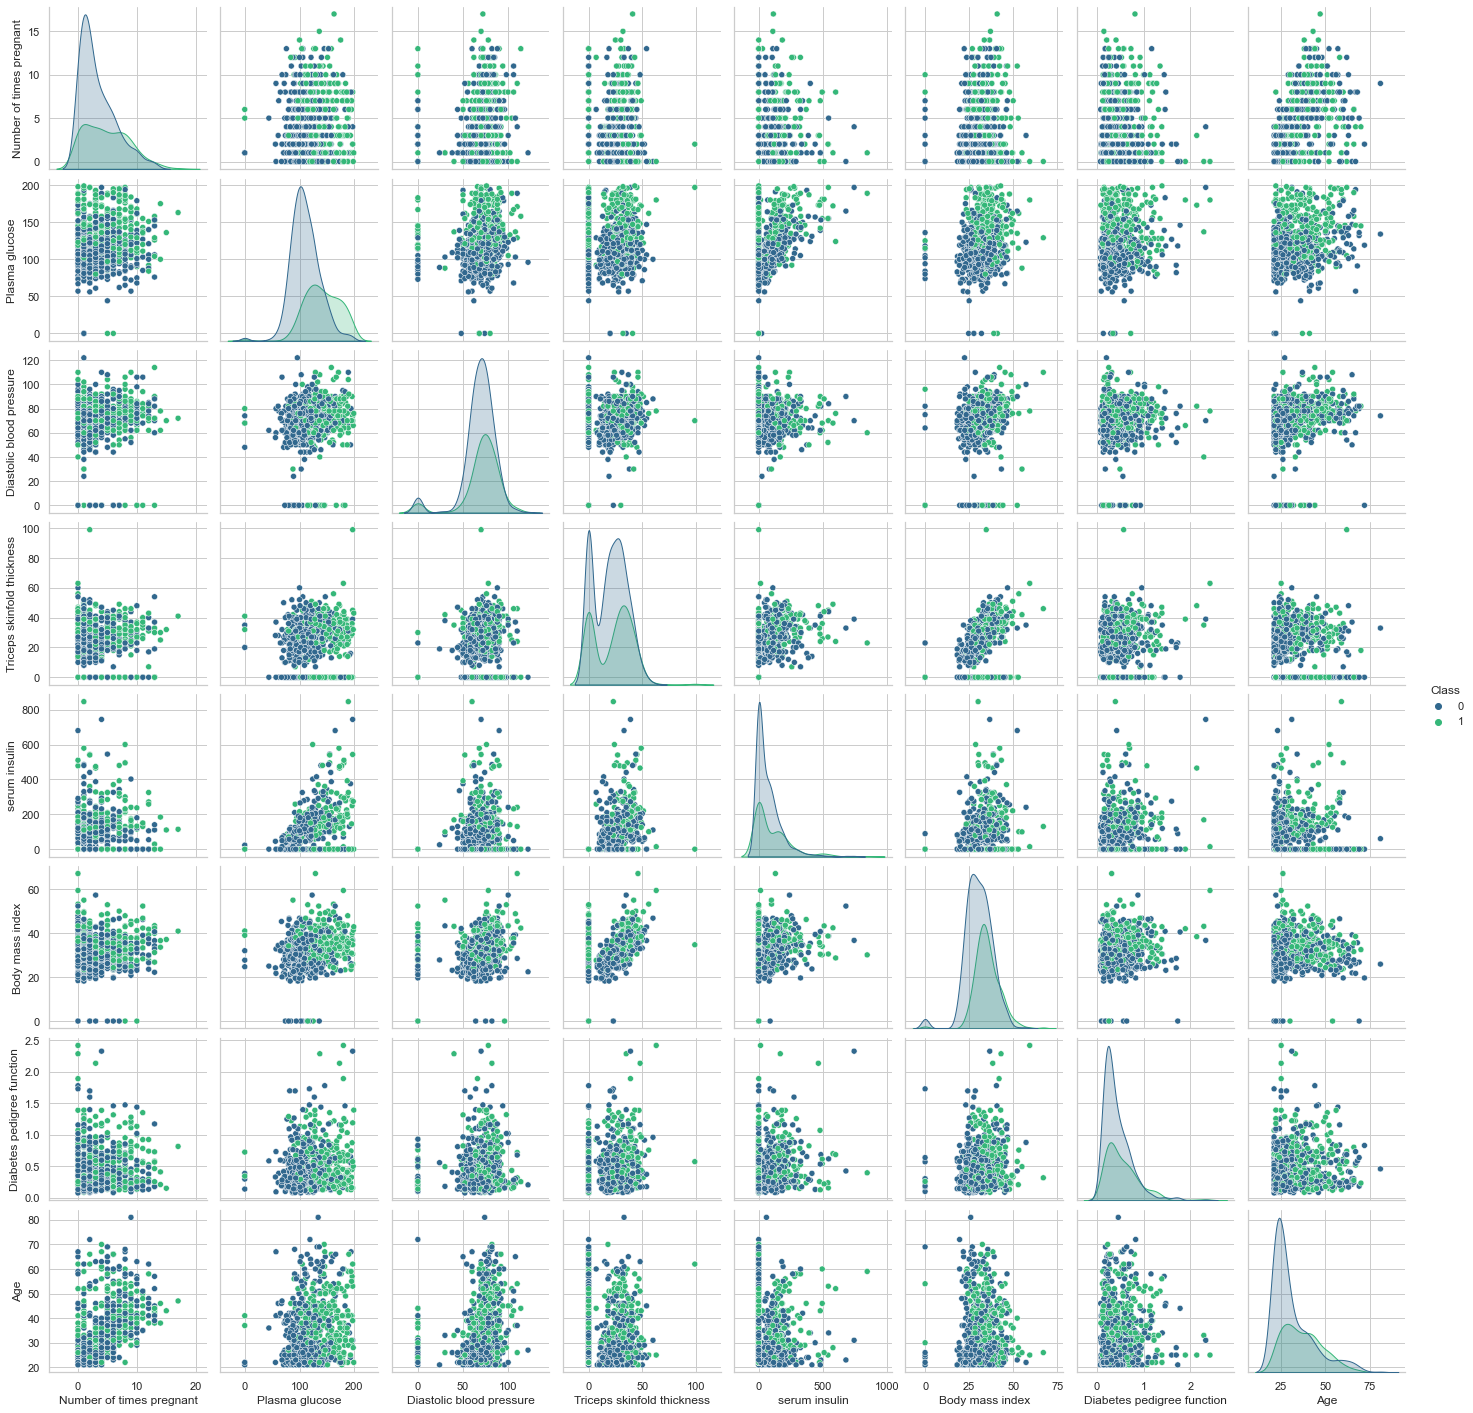

In [176]:
sns.pairplot(df, hue = 'Class', palette = 'viridis')

In [177]:
df.corr()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Diastolic blood pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps skinfold thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body mass index,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

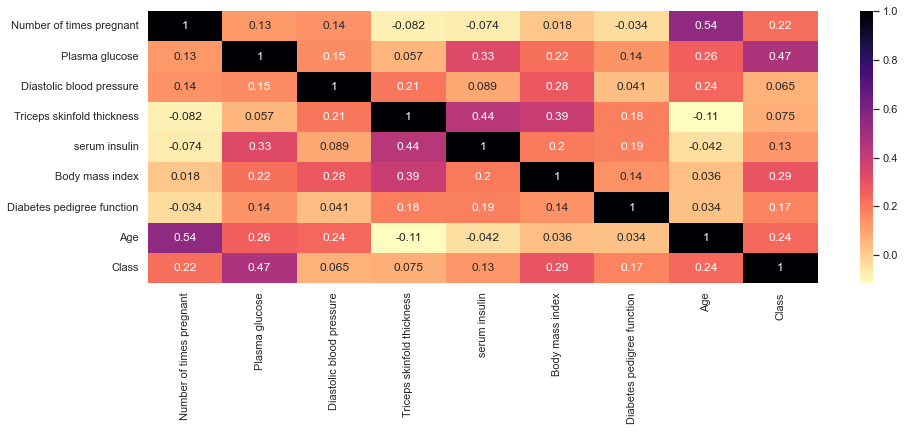

In [178]:
sns.heatmap(df.corr(), annot = True,cmap = 'magma_r')

**We don't see a significant correlation between our features except for "serum insulin" and "Triceps Skinfold Thickness"**

### Checking number of rows with zero values for relevant columns

In [179]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows with 0 Plasma glucose: {0}".format(len(df.loc[df['Plasma glucose'] == 0])))
print("# rows with 0 Diastolic blood pressure: {0}".format(len(df.loc[df['Diastolic blood pressure'] == 0])))
print("# rows with 0 Triceps skinfold thickness: {0}".format(len(df.loc[df['Triceps skinfold thickness'] == 0])))
print("# rows with 0 serum insulin: {0}".format(len(df.loc[df['serum insulin'] == 0])))
print("# rows with 0 Body mass index: {0}".format(len(df.loc[df['Body mass index'] == 0])))
print("# rows with 0 Diabetes pedigree function: {0}".format(len(df.loc[df['Diabetes pedigree function'] == 0])))
print("# rows with 0 Age: {0}".format(len(df.loc[df['Age'] == 0])))

# rows in dataframe 768
# rows with 0 Plasma glucose: 5
# rows with 0 Diastolic blood pressure: 35
# rows with 0 Triceps skinfold thickness: 227
# rows with 0 serum insulin: 374
# rows with 0 Body mass index: 11
# rows with 0 Diabetes pedigree function: 0
# rows with 0 Age: 0


In [187]:
df_copy = df.copy(deep = True)
df_copy[['Plasma glucose',
         'Diastolic blood pressure',
         'Triceps skinfold thickness',
         'serum insulin',
         'Body mass index',
         'Diabetes pedigree function',
         'Age']] = df_copy[['Plasma glucose',
                            'Diastolic blood pressure',
                            'Triceps skinfold thickness',
                            'serum insulin',
                            'Body mass index',
                            'Diabetes pedigree function',
                            'Age']].replace(0,'0.0')

## Splitting the Data Into Training and Test Data Sets

In [188]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Number of times pregnant', 'Plasma glucose', 'Diastolic blood pressure', 'Triceps skinfold thickness', 'serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age']
predicted_class_names = ['Class']

X = df_copy[feature_col_names].values
y = df_copy[predicted_class_names].values

split_test_size = 0.2

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=43)

### Ensuring the split ratio is correct i.e. 80/20

In [189]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_copy.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_copy.index)) * 100))

79.95% in training set
20.05% in test set


### Checking the distribution of data on the basis of "Class" column across Training and Test Data Sets and ensuring that it matches with the original distribution

In [190]:
print("Main Diabitic  : {0} ({1:0.2f}%)".format(len(df_copy.loc[df_copy['Class'] == 1]), (len(df_copy.loc[df_copy['Class'] == 1])/len(df_copy.index)) * 100.0))
print("Main Non-Diabitic : {0} ({1:0.2f}%)".format(len(df_copy.loc[df_copy['Class'] == 0]), (len(df_copy.loc[df_copy['Class'] == 0])/len(df_copy.index)) * 100.0))
print("")
print("Training Diabitic  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Non-Diabitic : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test Diabitic      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test Non-Diabitic     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Main Diabitic  : 268 (34.90%)
Main Non-Diabitic : 500 (65.10%)

Training Diabitic  : 214 (34.85%)
Training Non-Diabitic : 400 (65.15%)

Test Diabitic      : 54 (35.06%)
Test Non-Diabitic     : 100 (64.94%)


In [191]:
df_copy.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Creating our pipeline and Using it to run the Logistic Regression Model

In [211]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

def generate_estimates():
    cat_vars = [-1]
    num_vars = [0,1,2,3,4,5,6,7]

    num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0.0,strategy='mean')),
                           ('standardize_num', StandardScaler())
                        ])
    
    num_transformer = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars)])
    
    processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', OneHotEncoder(handle_unknown='ignore'), cat_vars)
                                                     ]
                                        )

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='none'))]
    )

    return modeling_pipeline.fit(X_train, y_train)

m = generate_estimates()
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## Metric Selection
**We choose to use the recall metric as it measures how well the model is predicting prevalance of diabetes. In other words, it gives us the true positive rate or percentage of positives we have correctly predicted. Since we are predicting the "Class" variable here our aim is to predicted the true positives correctly. Hence, we choose recall as our Metric of choice.**

- The recall value as of now is 0.61 which seems to be pretty low. A possible reason for this could be the improper ratio of the "Class" column.

### Here we try to improve our results by changing the regularization parameter for our model

1st max value of 0.593 occured at C=0.200


Text(0, 0.5, 'recall score')

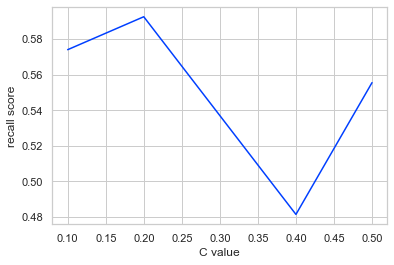

In [215]:
from sklearn import metrics

# Using 5 different regularization strengths
C_start = 0.1
C_end = 0.6
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=43)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))


# Let's plot the changes in C-values against recall scores to see how the regularization scores impact the recall score

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

- As we can see, regularization did not help us much here.

1st max value of 0.704 occured at C=0.100


Text(0, 0.5, 'recall score')

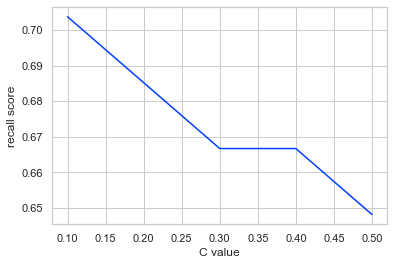

In [205]:
# Similarly to the above section, this will try C value from 0.1 to 0.6 in increments of 0.1.
# For each C-value, it will create a logistic regression and train with the train data, with classes being balanced.
# Afterwards, it will predict the test data for the different C-values, and the highest result is recorded.

C_start = 0.1
C_end = 0.6
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
#     the difference here vs. the original logistic regression model is that this line below includes "class_weight='balanced'"
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=43)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))



# Plot the changes in C-values against recall scores to see how the regularization scores impact the recall score, with classes being balanced. 

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

**As we had correctly estimated, after balancing our "Class" variable, we have a much better recall score**

### Running the Classification Report for Logistic regression model with balanced classes

In [206]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=43)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7078
[[71 29]
 [16 38]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       100
           1       0.57      0.70      0.63        54

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.71      0.71       154

0.7037037037037037


## Running Logistic Regression with Cross Validation 

In [207]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=43, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=43, refit=False)

In [216]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Confusion Matrix")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Confusion Matrix
Accuracy: 0.7468
[[79 21]
 [18 36]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.63      0.67      0.65        54

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



#### Logistic Regression with balanced weights:

Recall is 0.67. This is lower than the Logistic Regression model with balanced weight.

## Summary:

Among the models we evaluated i.e.:

- Logistic Regression
- Logistic Regression with Balanced Classes
- Logistic Regression with Cross Validation

**Logistic Regression with balanced classes** seems to provide the best recall value (0.70).